In [89]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\DSData-master\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# checking the shape
df.shape

(7043, 21)

In [4]:
#checking for nulls
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# as there are no nulls lets move further
# lets check for datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# it is observed that total charges has continuous data but it is object datatype
#lets handle it
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df['TotalCharges'].nunique()

6531

In [8]:
df.shape[0]

7043

In [9]:
# lets check for white space
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#lets replace it with nulls
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [11]:
# now checking for nulls
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#converting the object column datatype to integer
df['TotalCharges']=df["TotalCharges"].astype(float)

In [13]:
# now lets check the dtypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
#lets treat nulls 
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [15]:
#data visualiation
# for that importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# dataframe for categorical
df_nominal=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']].copy()
df_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [17]:
#visualiation of data for categorical data

Male      3555
Female    3488
Name: gender, dtype: int64


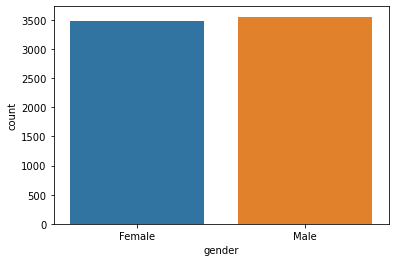

In [18]:
ax=sns.countplot(x='gender',data=df_nominal)
print(df_nominal["gender"].value_counts())

In [19]:
# number of males are more as compared to female

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


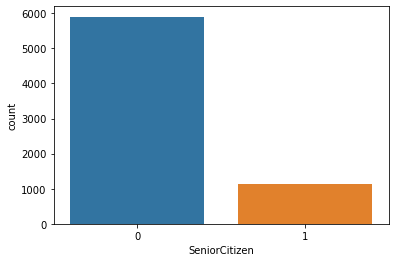

In [20]:
ax=sns.countplot(x='SeniorCitizen',data=df_nominal)
print(df_nominal["SeniorCitizen"].value_counts())

In [21]:
# 0 means they are not senior citizen
# they are younger citizens and they are 5901 in number
# 1 means they are senior citizen

No     3641
Yes    3402
Name: Partner, dtype: int64


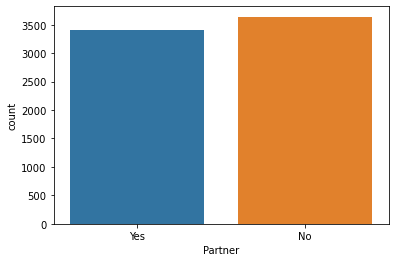

In [22]:
ax=sns.countplot(x='Partner',data=df_nominal)
print(df_nominal["Partner"].value_counts())

In [23]:
# number of citizens having spouse are 3641 and single citizens are 3402

No     4933
Yes    2110
Name: Dependents, dtype: int64


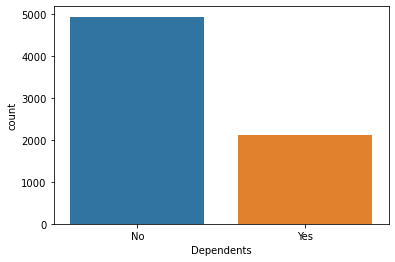

In [24]:
ax=sns.countplot(x='Dependents',data=df_nominal)
print(df_nominal["Dependents"].value_counts())

In [25]:
# number of dependents are 2110 and independents are 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


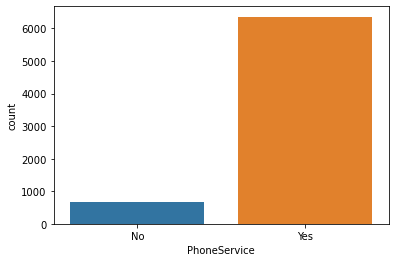

In [26]:
ax=sns.countplot(x='PhoneService',data=df_nominal)
print(df_nominal["PhoneService"].value_counts())

In [27]:
# it is observed that most of the peoples use phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


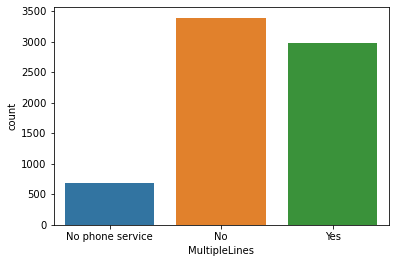

In [28]:
ax=sns.countplot(x='MultipleLines',data=df_nominal)
print(df_nominal["MultipleLines"].value_counts())

In [29]:
# it is observed that very less number of peoples are there who dont use phone service
# 2971 use multiple lines
#3390 use single 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


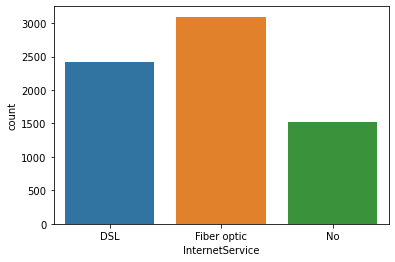

In [30]:
ax=sns.countplot(x='InternetService',data=df_nominal)
print(df_nominal["InternetService"].value_counts())

In [31]:
#3096 use fiber optic
#2421 uses dsl
# and very less ie 1526 doesnt use internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


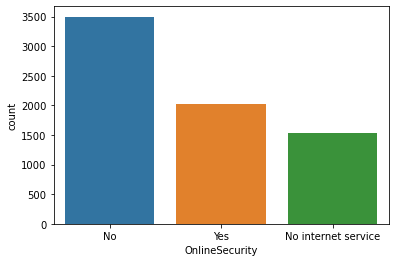

In [32]:
ax=sns.countplot(x='OnlineSecurity',data=df_nominal)
print(df_nominal["OnlineSecurity"].value_counts())

In [33]:
# as 1526 doesnt use internet service they doesnt use the feature online securit
# mostof the people ie 3498 doesnt use online security
# only 2019 uses online security

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


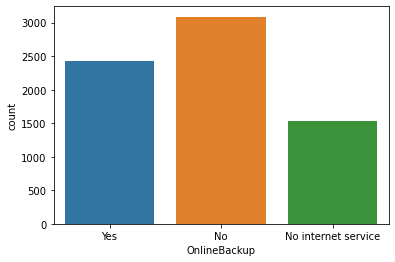

In [34]:
ax=sns.countplot(x='OnlineBackup',data=df_nominal)
print(df_nominal["OnlineBackup"].value_counts())

In [35]:
#large number of people doesnt do online backup
#2429 use the feature online backup
# those who doesnt use internet service cant use online backup

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


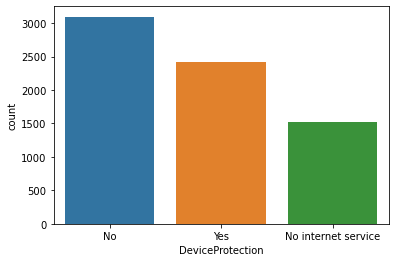

In [36]:
ax=sns.countplot(x='DeviceProtection',data=df_nominal)
print(df_nominal["DeviceProtection"].value_counts())

In [37]:
#3095 dont use device protection
#2422 uses device protection feature
#1526 dont use internet service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


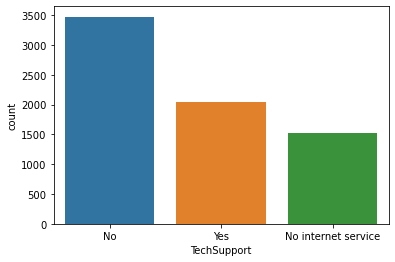

In [38]:
ax=sns.countplot(x='TechSupport',data=df_nominal)
print(df_nominal["TechSupport"].value_counts())

In [39]:
#techsupport doesnt use by more people 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


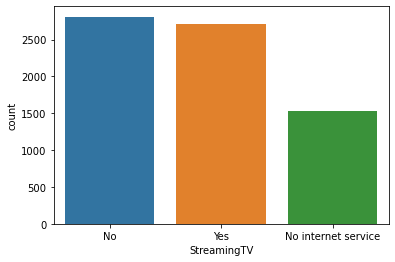

In [40]:
ax=sns.countplot(x='StreamingTV',data=df_nominal)
print(df_nominal["StreamingTV"].value_counts())

In [41]:
# 2810 doesnt use streaming tv
#2707 use streaming tv


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


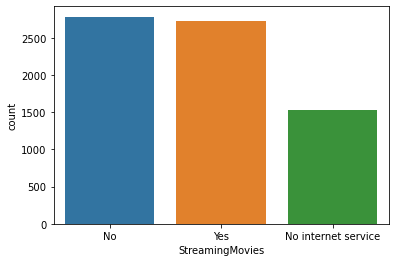

In [42]:
ax=sns.countplot(x='StreamingMovies',data=df_nominal)
print(df_nominal["StreamingMovies"].value_counts())

In [43]:
# as 1526 doesn't use internet service they dont see movies

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


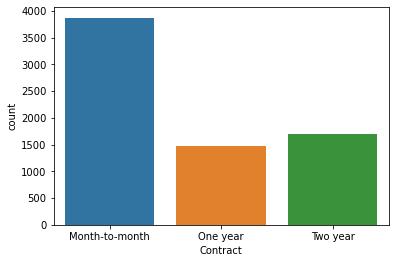

In [44]:
ax=sns.countplot(x='Contract',data=df_nominal)
print(df_nominal["Contract"].value_counts())

In [45]:
# most of the people prefer month to month payment
# as some peoples take two year plan might be they must be getting some offer

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


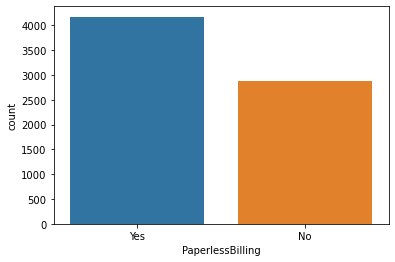

In [46]:
ax=sns.countplot(x='PaperlessBilling',data=df_nominal)
print(df_nominal["PaperlessBilling"].value_counts())

In [47]:
# people prefer to pay online so no paper bill 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


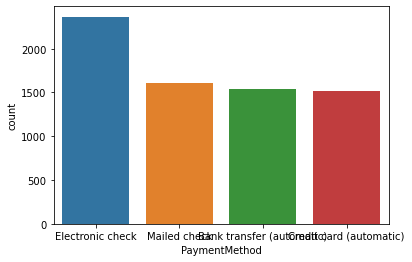

In [48]:
ax=sns.countplot(x='PaymentMethod',data=df_nominal)
print(df_nominal["PaymentMethod"].value_counts())

In [49]:
# most of the people use electronic way to pay the bill

No     5174
Yes    1869
Name: Churn, dtype: int64


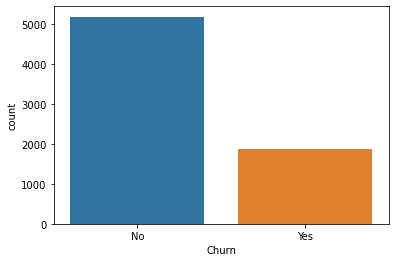

In [50]:
ax=sns.countplot(x='Churn',data=df_nominal)
print(df_nominal["Churn"].value_counts())

In [51]:
# very less people shift from one network to other

In [52]:
#  ordinal data
df_ordinal=df[['customerID','tenure']].copy()
df_ordinal.columns

Index(['customerID', 'tenure'], dtype='object')

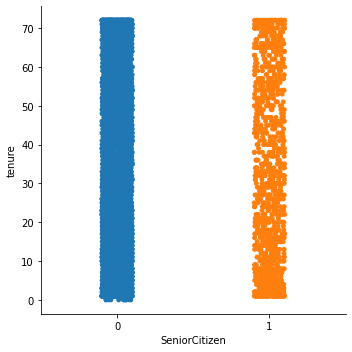

In [53]:
sns.catplot(x="SeniorCitizen",y="tenure",data=df)

In [54]:
df_continuous=df[["MonthlyCharges","TotalCharges"]].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

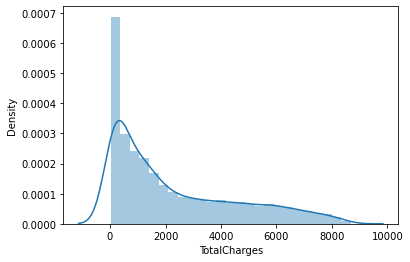

In [55]:
sns.distplot(df_continuous['TotalCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

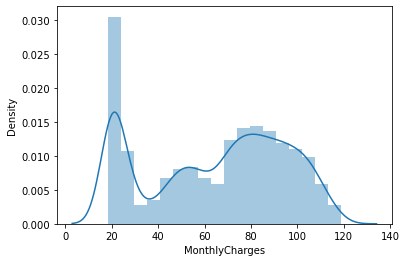

In [56]:
sns.distplot(df_continuous['MonthlyCharges'],kde=True)

In [57]:
# the dataset has lot of string values we will use one hot encoder to convert string into numerics
from sklearn.preprocessing import OrdinalEncoder

In [58]:
enc=OrdinalEncoder()

In [59]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [60]:
# lets plot heat map to check the correlation with target column

In [61]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

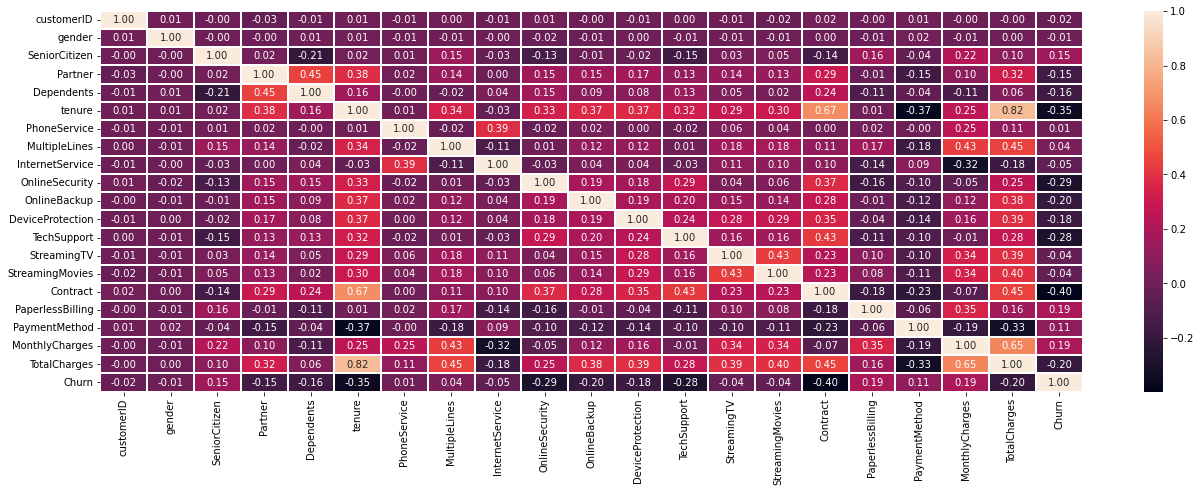

In [62]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,fmt="0.2f")

In [63]:
# as we can see there is correlation between tenure and total charges
# butbwe are not deleting any column

In [64]:
# lets check the skewness
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [65]:
#keeping +/-0.5 as the range for skewness,we will treat the skewness only for int and float datatype originally 

In [66]:
# lets check the outliers using boxplot

In [68]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

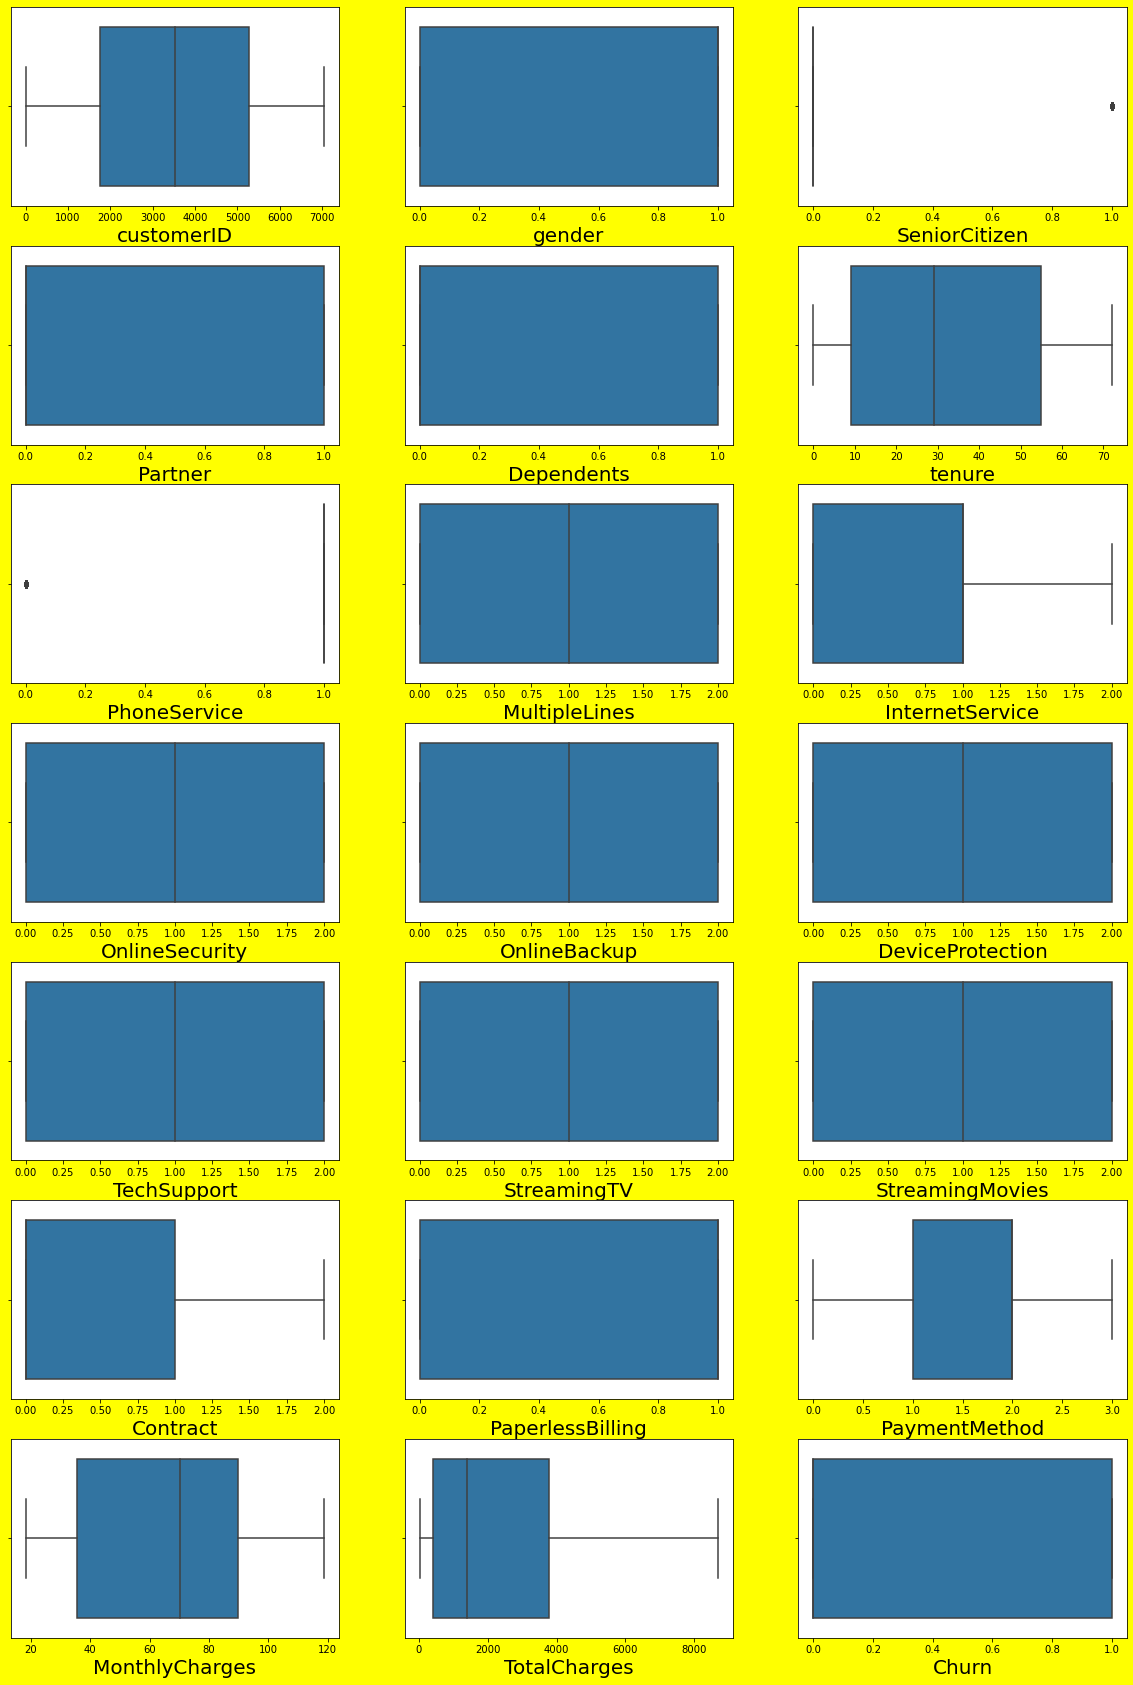

In [69]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [70]:
# since the column senio citizen is nominal type we cannot consider it as outliers

In [71]:
df.shape

(7043, 21)

In [72]:
# lets treat the outliers using zscore

In [73]:
# lets import necessary library
from scipy.stats import zscore

In [74]:
import numpy as np
z=np.abs(zscore(df))
threshholds=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [75]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z.shape


(6361, 21)

In [77]:
# lets check how much we have lost our data
data_loss=((7043-6361)/7043)*100
data_loss

9.683373562402386

In [79]:
# lets seperate features and label 
x=df.drop("TotalCharges",axis=1)
y=df["TotalCharges"]

In [80]:
# lets scale the data
from sklearn.preprocessing import StandardScaler

In [87]:
from sklearn.metrics import r2_score

In [83]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
lr=LinearRegression()

In [88]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state{i},the training score is:{r2_score(y_train,pred_train)}")
    print(f"at random state{i},the testing score is:{r2_score(y_test,pred_test)}")
    print("\n")

at random state0,the training score is:0.9049923210585944
at random state0,the testing score is:0.9021798127771083


at random state1,the training score is:0.904917184339662
at random state1,the testing score is:0.9019063325679917


at random state2,the training score is:0.9057011726740728
at random state2,the testing score is:0.8996995563633459


at random state3,the training score is:0.9047450325782641
at random state3,the testing score is:0.9026489843969138


at random state4,the training score is:0.9032507096275094
at random state4,the testing score is:0.9071315680776829


at random state5,the training score is:0.9030657548671236
at random state5,the testing score is:0.9074857395695944


at random state6,the training score is:0.9026194473123603
at random state6,the testing score is:0.9091462233469572


at random state7,the training score is:0.9037696299042223
at random state7,the testing score is:0.9058238946947826


at random state8,the training score is:0.9035230991886962
at rand

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [91]:
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9026735048179821


In [93]:
# cross validation of model
from sklearn.model_selection import cross_val_score

In [95]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

In [96]:
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"at cross fold{i}the cv score is{cv_mean}and accuracy_score for training is {train_accuracy}and accuracy for testing is {test_accuracy}")
    print("\n")

at cross fold2the cv score is0.9033382537767014and accuracy_score for training is -0.8551430110342535and accuracy for testing is 0.9026735048179821


at cross fold3the cv score is0.9037012261875313and accuracy_score for training is -0.8551430110342535and accuracy for testing is 0.9026735048179821


at cross fold4the cv score is0.9037044584134895and accuracy_score for training is -0.8551430110342535and accuracy for testing is 0.9026735048179821


at cross fold5the cv score is0.9036665825623267and accuracy_score for training is -0.8551430110342535and accuracy for testing is 0.9026735048179821


at cross fold6the cv score is0.9037349024389357and accuracy_score for training is -0.8551430110342535and accuracy for testing is 0.9026735048179821


at cross fold7the cv score is0.9035677539347997and accuracy_score for training is -0.8551430110342535and accuracy for testing is 0.9026735048179821


at cross fold8the cv score is0.9035565941557734and accuracy_score for training is -0.855143011034253

In [97]:
# since the number of folds doesnt have much impact on accuracy and cv_score so cv=5 is selected

In [98]:
#regularization
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [99]:
from sklearn.linear_model import Lasso

In [100]:
parameters={'alpha':[.0001,.001,.01,.01,1],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [101]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_training*100
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss*100

90.266083198372

In [102]:
#ensemble technique
from sklearn.ensemble import RandomForestRegressor

In [103]:
parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [106]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('r2score',rfs*100)
cvs=cross_val_score(rf,x,y,cv=5)
cvs_score=cvs.mean()
print("cross val score",cvs_score*100)

r2score 99.88292553481617
cross val score 99.87383072394286


In [107]:
# lets save the model
import pickle

In [109]:
pickle.dump(rf,open('churn','wb'))
loaded_model=pickle.load(open('churn','rb'))

In [110]:
result=loaded_model.score(x_test,y_test)
print(result*100)

99.88292553481617


In [111]:
# thank you